In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.formula.api as smf
from sklearn import metrics



In [5]:
Data = pd.read_csv("advertising.csv")

In [10]:
Data.head(5)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [7]:
Data.shape

(200, 4)

In [8]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [9]:
Data.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
Radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
Newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
Sales,200.0,15.1305,5.283892,1.6,11.000,16.00,19.050,27.0


In [11]:
Data.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [21]:
def var_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(),  x.std(), x.var(), x.min(), x.quantile(0.01), x.quantile(0.05),x.quantile(0.10),x.quantile(0.25),x.quantile(0.50),x.quantile(0.75), x.quantile(0.90),x.quantile(0.95), x.quantile(0.99),x.max()],
                  index=['N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'MIN', 'P1' , 'P5' ,'P10' ,'P25/Q1' ,'P50/Q2' ,'P75/Q3' ,'P90' ,'P95' ,'P99' ,'MAX'])


In [22]:
def var_summary(x):
    uc = x.mean()+(2*x.std())
    lc = x.mean()-(2*x.std())

    for i in x:
        if i<lc or i>uc:
            count = 1
        else:
            count = 0
    outlier_flag = count
    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(),  x.std(), x.var(), x.min(), x.quantile(0.01), x.quantile(0.05),x.quantile(0.10),x.quantile(0.25),x.quantile(0.50),x.quantile(0.75), x.quantile(0.90),x.quantile(0.95), x.quantile(0.99),x.max() , lc , uc,outlier_flag],
                  index=['N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'MIN', 'P1' , 'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX','LC','UC','outlier_flag'])


In [23]:
Data.apply(lambda x: var_summary(x)).T

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,...,P25,P50,P75,P90,P95,P99,MAX,LC,UC,outlier_flag
TV,200.0,0.0,29408.5,147.0425,149.75,85.854236,7370.949893,0.7,5.387,13.195,...,74.375,149.75,218.825,261.44,280.735,292.907,296.4,-24.665973,318.750973,0.0
Radio,200.0,0.0,4652.8,23.2640,22.90,14.846809,220.427743,0.0,0.399,1.995,...,9.975,22.90,36.525,43.52,46.810,49.400,49.6,-6.429618,52.957618,0.0
Newspaper,200.0,0.0,6110.8,30.5540,25.75,21.778621,474.308326,0.3,0.999,3.600,...,12.750,25.75,45.100,59.07,71.825,89.515,114.0,-13.003242,74.111242,0.0
Sales,200.0,0.0,3026.1,15.1305,16.00,5.283892,27.919517,1.6,4.784,6.600,...,11.000,16.00,19.050,21.71,23.800,25.507,27.0,4.562715,25.698285,0.0


In [24]:
var_summary(Data.Newspaper)

N                200.000000
NMISS              0.000000
SUM             6110.800000
MEAN              30.554000
MEDIAN            25.750000
STD               21.778621
VAR              474.308326
MIN                0.300000
P1                 0.999000
P5                 3.600000
P10                5.990000
P25               12.750000
P50               25.750000
P75               45.100000
P90               59.070000
P95               71.825000
P99               89.515000
MAX              114.000000
LC               -13.003242
UC                74.111242
outlier_flag       0.000000
dtype: float64

In [25]:
var_summary(Data.Sales)

N                200.000000
NMISS              0.000000
SUM             3026.100000
MEAN              15.130500
MEDIAN            16.000000
STD                5.283892
VAR               27.919517
MIN                1.600000
P1                 4.784000
P5                 6.600000
P10                7.960000
P25               11.000000
P50               16.000000
P75               19.050000
P90               21.710000
P95               23.800000
P99               25.507000
MAX               27.000000
LC                 4.562715
UC                25.698285
outlier_flag       0.000000
dtype: float64

In [26]:
Data['Sales']=Data['Sales'].fillna(Data['Sales'].mean())

<Axes: xlabel='Sales', ylabel='Count'>

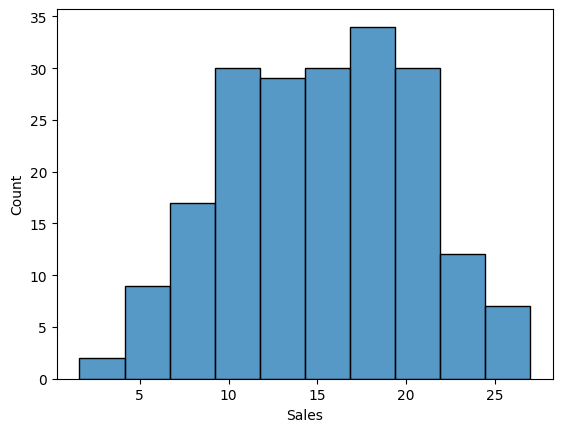

In [30]:
sns.histplot(Data.Sales)

<Axes: >

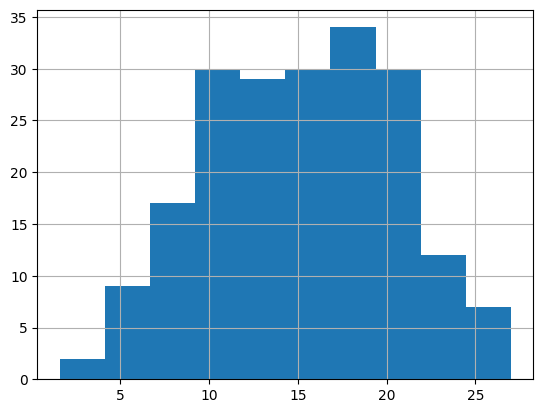

In [31]:
Data.Sales.hist()

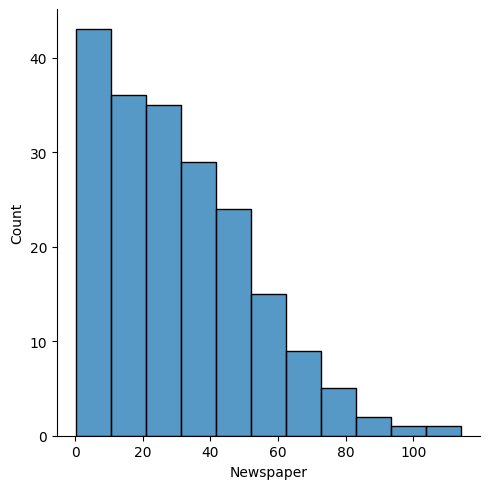

In [33]:
sns.displot( Data.Newspaper )

<Axes: >

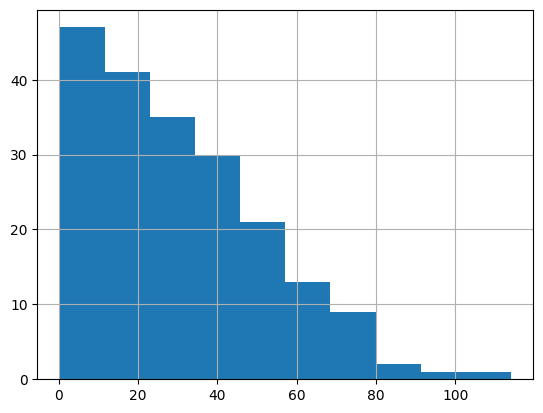

In [34]:
Data.Newspaper.hist()

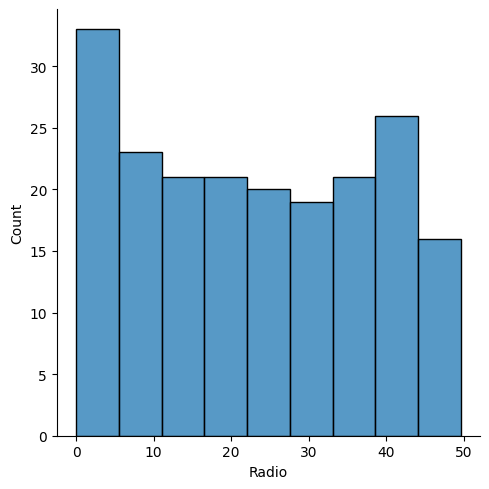

In [36]:
sns.displot(Data.Radio)

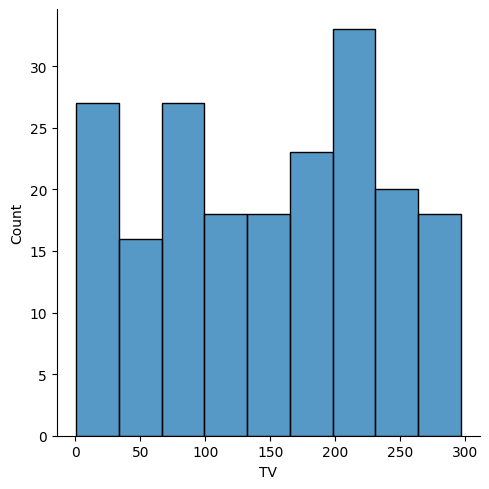

In [37]:
sns.displot( Data.TV)

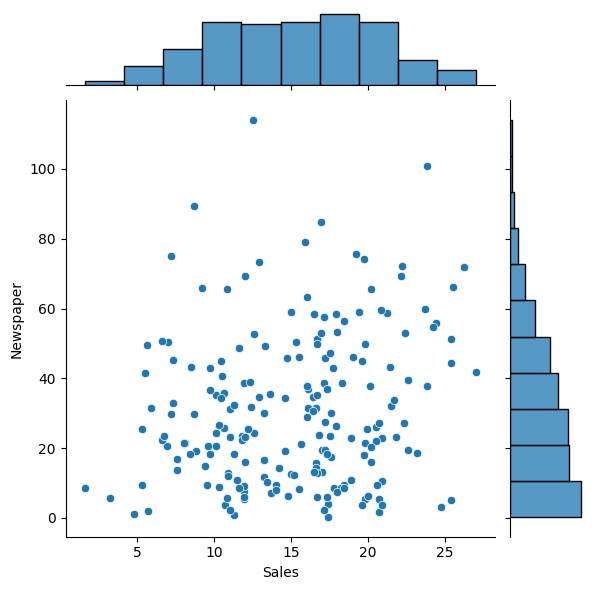

In [43]:
sns.jointplot( Data, x= "Sales", y = "Newspaper")

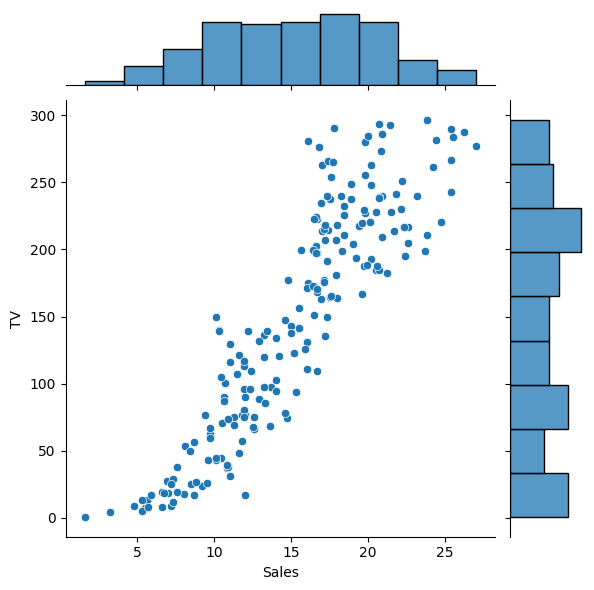

In [42]:
sns.jointplot( Data, x= "Sales", y = "TV")


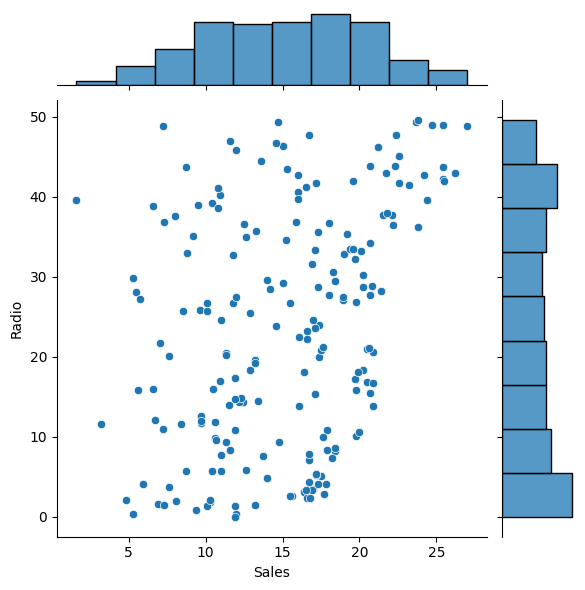

In [44]:
sns.jointplot( Data, x= "Sales", y = "Radio")

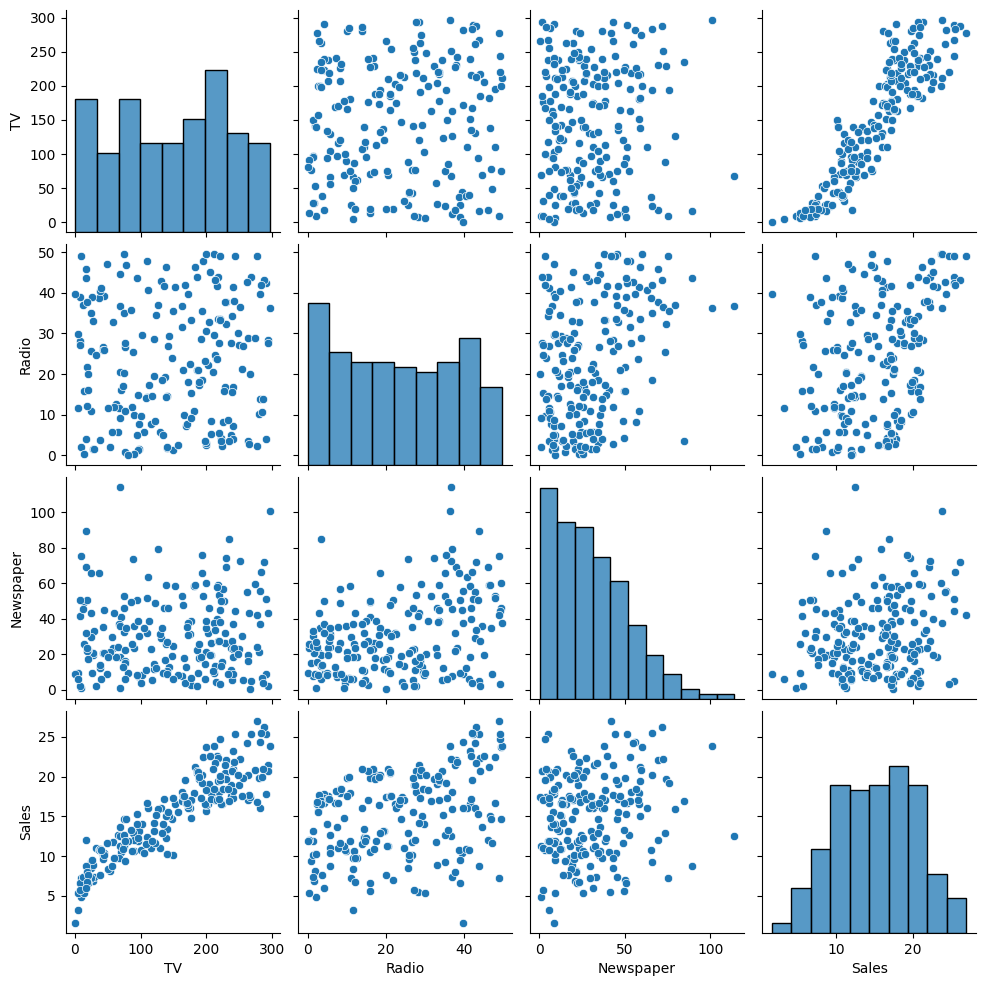

In [45]:
sns.pairplot ( Data)

In [46]:
Data.TV.corr( Data.Sales)

0.9012079133023306

In [47]:
Data.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


<Axes: >

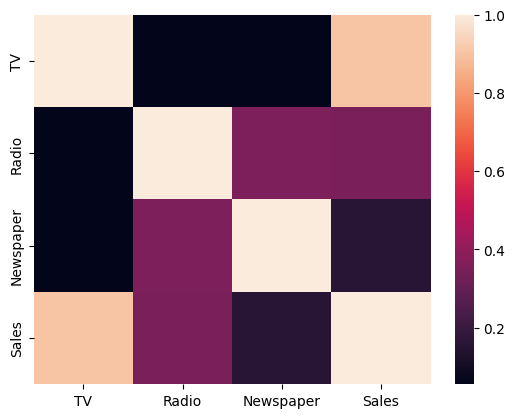

In [48]:
sns.heatmap( Data.corr())

In [51]:
lm = smf.ols('Sales ~ TV + Radio + Newspaper', Data).fit()

In [52]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     605.4
Date:                Thu, 26 Oct 2023   Prob (F-statistic):           8.13e-99
Time:                        17:38:30   Log-Likelihood:                -383.34
No. Observations:                 200   AIC:                             774.7
Df Residuals:                     196   BIC:                             787.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.6251      0.308     15.041      0.000       4.019       5.232
TV             0.0544      0.001     39.592      0.000       0.052       0.057
Radio          0.1070      0.008     12.604      0.000       0.090       0.124
Newspaper      0.0003      0.006      0.058      0.954      -0.011       0.012
==============================================================================
Omnibus:                       16.081   Durbin-Watson:                   2.251
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.655
Skew:                          -0.431   Prob(JB):                     9.88e-07
Kurtosis:                       4.605   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [53]:
lm = smf.ols('Sales ~ TV + Radio', Data ).fit()

In [54]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     912.7
Date:                Thu, 26 Oct 2023   Prob (F-statistic):          2.39e-100
Time:                        17:39:06   Log-Likelihood:                -383.34
No. Observations:                 200   AIC:                             772.7
Df Residuals:                     197   BIC:                             782.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.6309      0.290     15.952      0.000       4.058       5.203
TV             0.0544      0.001     39.726      0.000       0.052       0.057
Radio          0.1072      0.008     13.522      0.000       0.092       0.123
==============================================================================
Omnibus:                       16.227   Durbin-Watson:                   2.252
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.973
Skew:                          -0.434   Prob(JB):                     8.43e-07
Kurtosis:                       4.613   Cond. No.                         425.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [55]:
lm.params

Intercept    4.630879
TV           0.054449
Radio        0.107175
dtype: float64

In [56]:
lm.conf_int()

,0,1
Intercept,4.058369,5.203390
TV,0.051746,0.057152
Radio,0.091544,0.122805


In [58]:
print(dir(metrics))

['ConfusionMatrixDisplay', 'DetCurveDisplay', 'DistanceMetric', 'PrecisionRecallDisplay', 'PredictionErrorDisplay', 'RocCurveDisplay', 'SCORERS', '__all__', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '_base', '_classification', '_dist_metrics', '_pairwise_distances_reduction', '_pairwise_fast', '_plot', '_ranking', '_regression', '_scorer', 'accuracy_score', 'adjusted_mutual_info_score', 'adjusted_rand_score', 'auc', 'average_precision_score', 'balanced_accuracy_score', 'brier_score_loss', 'calinski_harabasz_score', 'check_scoring', 'class_likelihood_ratios', 'classification_report', 'cluster', 'cohen_kappa_score', 'completeness_score', 'confusion_matrix', 'consensus_score', 'coverage_error', 'd2_absolute_error_score', 'd2_pinball_score', 'd2_tweedie_score', 'davies_bouldin_score', 'dcg_score', 'det_curve', 'euclidean_distances', 'explained_variance_score', 'f1_score', 'fbeta_score', 'fowlkes_mallows_score', 'ge

In [59]:
lm.rsquared

0.9025896186081139

In [60]:
round(  float (lm.rsquared) , 2)

0.9

In [61]:
ltmpredic = lm.predict(Data)

In [62]:
ltmpredic[1:10]

1    11.265819
2    10.486714
3    17.306207
4    15.632737
5    10.345422
6    11.277021
7    13.276266
8     5.324207
9    15.788436
dtype: float64

In [63]:
mse =  metrics.mean_squared_error( Data.Sales, ltmpredic)

In [64]:
rmse = np.sqrt ( mse)

In [65]:
rmse

1.6450083823140502

In [66]:
lm.resid[1:10]

1   -0.865819
2    1.513286
3   -0.806207
4    2.267263
5   -3.145422
6    0.522979
7   -0.076266
8   -0.524207
9   -0.188436
dtype: float64